# Normalization by no stimuli and plate

In [43]:
import os
import cv2
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.colors import Normalize
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
negsi_features_path = '../results/NegsiRNA_features.csv'
df_negsi = pd.read_csv(negsi_features_path, index_col=0)
df_negsi

,cell_area_ratio,white_area_ratio,e2e_n,e2e_distance_mean,e2e_distance_std,e2e_eu_distance_mean,e2e_eu_distance_std,e2e_distance_ratio_mean,e2e_distance_ratio_std,j2e_n,...,nodes_mean,nodes_std,medial_axis_mean,medial_axis_std,voronoi_approx_mean,voronoi_approx_std,std_filter_mean,std_filter_std,entropy_filter_mean,entropy_filter_std
NegsiRNA_C3c_CA,0.752011,0.153746,2,2.828427,0.000000,2.828427,0.000000,1.000000,0.000000,213,...,3.132353,0.368235,6.126745,4.889685,6.160088,4.341952,886.744484,567.857117,3.294059,0.607975
NegsiRNA_C3b_CA,0.631848,0.304616,10,2.065685,1.209126,2.047871,1.204724,0.992621,0.023335,304,...,3.121311,0.333116,9.222267,5.114865,9.852569,4.716636,1473.784584,907.699106,3.826592,0.547050
NegsiRNA_E3_NO,0.611537,0.297828,0,NaN,NaN,NaN,NaN,NaN,NaN,446,...,3.139918,0.358568,9.098694,5.132398,9.999793,4.844048,1258.101060,806.036736,3.656484,0.564080
NegsiRNA_L2_NS,0.709905,0.188984,4,9.224874,15.898662,8.743313,14.935617,0.985439,0.029123,367,...,3.153752,0.372363,7.227587,5.183694,7.681531,5.221077,1124.563087,724.011826,3.548006,0.576590
NegsiRNA_L1_CA,0.651109,0.280913,2,15.207107,15.849242,15.009612,15.569942,0.992523,0.010574,281,...,3.125457,0.340574,7.994286,4.782496,8.415528,4.374887,936.928822,523.095031,3.395797,0.543960
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NegsiRNA_H2_CA,0.689017,0.249039,3,10.299832,14.899824,9.001932,12.804211,0.930342,0.067686,291,...,3.140118,0.351333,6.836953,3.580644,7.179864,3.303955,819.194245,491.938157,3.228909,0.567115
NegsiRNA_I3_NO,0.600780,0.287247,2,2.500000,2.121320,2.500000,2.121320,1.000000,0.000000,386,...,3.128516,0.339572,9.573630,6.039179,10.480125,5.891320,1523.283806,969.688855,3.831052,0.584908
NegsiRNA_I2_CA,0.617166,0.313862,0,NaN,NaN,NaN,NaN,NaN,NaN,507,...,3.161653,0.385674,8.714587,6.665367,9.414579,6.684823,866.894701,669.283183,3.223619,0.641581
NegsiRNA_H3_NS,0.617965,0.287646,5,10.028427,20.188177,9.434813,18.860816,0.987135,0.028767,288,...,3.116368,0.322654,9.349122,5.607799,9.949048,5.347977,1645.860411,1078.449245,3.914721,0.542904


In [3]:
test_features_path = '../results/Test_features.csv'
df_test = pd.read_csv(test_features_path, index_col=0)
df_test

,cell_area_ratio,white_area_ratio,e2e_n,e2e_distance_mean,e2e_distance_std,e2e_eu_distance_mean,e2e_eu_distance_std,e2e_distance_ratio_mean,e2e_distance_ratio_std,j2e_n,...,nodes_mean,nodes_std,medial_axis_mean,medial_axis_std,voronoi_approx_mean,voronoi_approx_std,std_filter_mean,std_filter_std,entropy_filter_mean,entropy_filter_std
AKT1_B2_NO,0.528307,0.330304,1,24.384776,NaN,23.021729,NaN,0.944103,NaN,297,...,3.127445,0.340954,10.948303,6.305560,11.958422,6.077615,2130.898293,1290.905374,4.154107,0.523035
ACTB_B2_CA,0.603739,0.280296,8,11.673097,16.213742,10.770630,13.984421,0.970518,0.047607,361,...,3.129856,0.344300,9.385630,6.708586,9.997991,6.821478,2097.093202,1445.999241,4.122258,0.566555
JUP_D1_NO,0.612691,0.291828,1,21.485281,NaN,19.313208,NaN,0.898904,NaN,238,...,3.139301,0.349306,8.035211,4.471861,8.483804,4.284300,884.329717,557.839598,3.290105,0.592684
FYN_E3_NS,0.683185,0.252473,4,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,224,...,3.133284,0.344235,8.543062,5.019643,9.138534,4.939976,1299.726488,880.195098,3.663046,0.595786
ACTN4_L1_NO,0.572628,0.319164,0,NaN,NaN,NaN,NaN,NaN,NaN,482,...,3.134304,0.346860,8.715788,5.563401,9.361921,5.309031,929.355931,596.420518,3.335647,0.604983
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PALLD_F2_CA,0.532583,0.352931,1,13.000000,NaN,13.000000,NaN,1.000000,NaN,272,...,3.124859,0.333959,10.779967,6.281335,11.602166,6.057167,1912.398261,1287.035445,4.046653,0.558139
EZR_C3_NO,0.648874,0.290315,1,2.000000,NaN,2.000000,NaN,1.000000,NaN,312,...,3.127075,0.344878,8.982927,5.137285,9.530259,4.744985,1397.882540,862.498094,3.763924,0.556228
DNMBP_A3_NO,0.603660,0.226212,0,NaN,NaN,NaN,NaN,NaN,NaN,411,...,3.135512,0.350006,7.369823,4.892748,7.902959,4.893513,1228.049113,686.319233,3.642820,0.560697
NUMB_E3_CA,0.654215,0.271097,0,NaN,NaN,NaN,NaN,NaN,NaN,275,...,3.131167,0.347745,8.482209,5.014825,9.041384,4.877564,1104.526785,716.463072,3.543888,0.565170


In [4]:
df_negsi = df_negsi.drop(columns=["e2e_n", "e2e_distance_mean", "e2e_distance_std", "e2e_eu_distance_mean", "e2e_eu_distance_std", "e2e_distance_ratio_mean", "e2e_distance_ratio_std"])
df_test = df_test.drop(columns=["e2e_n", "e2e_distance_mean", "e2e_distance_std", "e2e_eu_distance_mean", "e2e_eu_distance_std", "e2e_distance_ratio_mean", "e2e_distance_ratio_std"])

We check that there are no NaN in the resulting dataframes

In [5]:
(~df_negsi.isnull().to_numpy()).all(), (~df_test.isnull().to_numpy()).all()

(True, True)

In [6]:
negsi_template = "NegsiRNA_{}_NS"
df_test_norm = df_test.copy()
for index in df_test.index:
    plate_id = index.split("_")[1]
    name = negsi_template.format(plate_id)
    df_test_norm.loc[index] /= df_negsi.loc[name]

In [7]:
df_test_norm

,cell_area_ratio,white_area_ratio,j2e_n,j2e_distance_mean,j2e_distance_std,j2e_eu_distance_mean,j2e_eu_distance_std,j2e_distance_ratio_mean,j2e_distance_ratio_std,j2j_n,...,nodes_mean,nodes_std,medial_axis_mean,medial_axis_std,voronoi_approx_mean,voronoi_approx_std,std_filter_mean,std_filter_std,entropy_filter_mean,entropy_filter_std
AKT1_B2_NO,0.867840,1.031720,0.860870,1.057442,1.121909,1.054583,1.126439,0.999680,0.771400,0.996825,...,0.997990,0.986158,0.991546,0.912975,0.995970,0.942080,1.299647,1.219473,1.065536,0.919595
ACTB_B2_CA,0.991751,0.875518,1.046377,1.102060,1.224818,1.095780,1.242081,0.993488,1.060975,1.114286,...,0.998760,0.995835,0.850021,0.971329,0.832694,1.057384,1.279029,1.365985,1.057367,0.996111
JUP_D1_NO,0.917161,1.163636,0.772727,1.105425,1.203830,1.098675,1.186059,1.002522,0.987407,1.037333,...,1.000678,0.993599,1.091080,1.006429,1.080685,0.984457,0.949441,0.910069,0.985839,0.982077
FYN_E3_NS,0.946921,1.194457,0.772414,1.300324,1.512378,1.287692,1.512103,1.000524,0.917801,0.837754,...,1.002480,1.022090,1.237374,1.268564,1.254201,1.305578,1.042186,1.054693,1.005365,1.025188
ACTN4_L1_NO,0.849537,1.267349,1.229592,1.211695,1.024922,1.215741,1.048871,0.996887,0.961565,0.926499,...,0.997172,0.965932,1.406562,1.743231,1.419660,1.769928,1.218578,1.267149,1.058097,1.069782
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PALLD_F2_CA,0.857887,1.149638,0.676617,1.117197,1.246077,1.105103,1.194230,0.996746,1.495021,1.129082,...,0.998709,0.971494,0.982771,0.867791,0.951194,0.849938,1.256936,1.266724,1.059769,0.968999
EZR_C3_NO,1.011072,1.090115,1.118280,1.034561,1.219497,1.027431,1.184816,0.996646,1.517338,1.071756,...,1.000539,1.035548,1.042845,1.029950,1.035253,0.991637,1.045163,1.091789,1.004871,1.037080
DNMBP_A3_NO,0.952471,0.827742,0.969340,1.201793,1.451825,1.189059,1.439023,1.001031,0.679476,0.744433,...,1.000087,1.005582,0.921754,1.031096,0.913068,1.067579,1.070425,0.969357,1.018660,0.988047
NUMB_E3_CA,0.906768,1.282567,0.948276,1.165044,1.103318,1.163711,1.112498,1.001552,0.814917,1.098284,...,1.001802,1.032512,1.228560,1.267346,1.240868,1.289083,0.885665,0.858501,0.972660,0.972506


In [8]:
negsi_template = "NegsiRNA_{}_NS"
df_negsi_norm = df_negsi.copy()
df_negsi_norm = df_negsi_norm[df_negsi_norm.index.str[-2:] != 'NS']
for index in df_negsi_norm.index:
    plate_id = index.split("_")[1]
    name = negsi_template.format(plate_id)
    df_negsi_norm.loc[index] /= df_negsi.loc[name]

In [9]:
df_negsi_norm

,cell_area_ratio,white_area_ratio,j2e_n,j2e_distance_mean,j2e_distance_std,j2e_eu_distance_mean,j2e_eu_distance_std,j2e_distance_ratio_mean,j2e_distance_ratio_std,j2j_n,...,nodes_mean,nodes_std,medial_axis_mean,medial_axis_std,voronoi_approx_mean,voronoi_approx_std,std_filter_mean,std_filter_std,entropy_filter_mean,entropy_filter_std
NegsiRNA_C3c_CA,0.958409,0.924889,0.816092,0.895434,0.924700,0.899196,0.914150,1.008983,0.796037,0.965066,...,0.983010,0.837859,0.917239,1.057716,0.892743,0.979691,0.961896,0.853741,0.994454,0.963099
NegsiRNA_C3b_CA,0.989251,1.131211,0.987013,0.951304,0.857453,0.948928,0.845488,1.001250,1.129423,1.154545,...,0.997909,0.981852,1.022764,0.777754,1.020364,0.725274,1.145798,1.205540,1.033558,0.993650
NegsiRNA_E3_NO,0.847614,1.409034,1.537931,1.093496,0.813423,1.097496,0.810296,0.999936,0.894502,1.307332,...,1.004602,1.064648,1.317852,1.297060,1.372403,1.280225,1.008809,0.965833,1.003564,0.970631
NegsiRNA_L1_CA,0.965968,1.115463,0.716837,1.171832,1.024830,1.187924,1.077323,1.005102,0.621947,0.770793,...,0.994358,0.948427,1.290125,1.498543,1.276147,1.458503,1.228508,1.111363,1.077177,0.961877
NegsiRNA_H1_CA,0.957800,1.081803,0.860534,1.064179,0.946270,1.066657,0.928734,1.006733,0.648727,0.879641,...,0.995543,0.944048,1.195015,1.381103,1.186190,1.389679,1.046758,1.112339,1.005830,1.051365
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NegsiRNA_D1_CA,0.964103,1.051784,0.938312,0.972557,0.821003,0.982357,0.831626,1.003427,1.156027,0.956000,...,0.994297,0.942064,1.097746,1.033463,1.080588,0.975964,1.237160,1.283014,1.064949,1.014224
NegsiRNA_H2_CA,1.050277,0.974432,0.871257,0.949212,0.875278,0.958104,0.901447,0.999284,1.076838,1.147586,...,1.004033,1.027940,0.862195,0.738207,0.848534,0.702020,0.550286,0.523542,0.840825,1.066063
NegsiRNA_I3_NO,0.883376,1.100605,1.176829,1.018099,1.050221,1.021456,1.034111,1.001043,0.855143,1.115873,...,1.002334,1.022441,1.103678,1.203922,1.121012,1.230758,1.419486,1.414308,1.094578,1.013883
NegsiRNA_I2_CA,0.969236,1.275168,1.630225,0.895859,0.727760,0.908262,0.735757,0.996812,1.148188,1.536011,...,1.009622,1.130223,1.101056,1.171935,1.128490,1.172420,0.418606,0.514055,0.778484,1.242106


In [10]:
df_norm = pd.concat([df_negsi_norm, df_test_norm])

In [11]:
pca_pipe = make_pipeline(StandardScaler(), PCA())
pca_pipe.fit(df_norm)
pca = pca_pipe.named_steps['pca']

Text(0, 0.5, &#39;Cumulative explained variance&#39;)

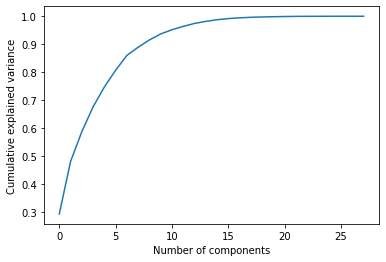

In [12]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

In [94]:
features_names = np.array(df_norm.columns)
features_names

array([&#39;cell_area_ratio&#39;, &#39;white_area_ratio&#39;, &#39;j2e_n&#39;,
       &#39;j2e_distance_mean&#39;, &#39;j2e_distance_std&#39;, &#39;j2e_eu_distance_mean&#39;,
       &#39;j2e_eu_distance_std&#39;, &#39;j2e_distance_ratio_mean&#39;,
       &#39;j2e_distance_ratio_std&#39;, &#39;j2j_n&#39;, &#39;j2j_distance_mean&#39;,
       &#39;j2j_distance_std&#39;, &#39;j2j_eu_distance_mean&#39;, &#39;j2j_eu_distance_std&#39;,
       &#39;j2j_distance_ratio_mean&#39;, &#39;j2j_distance_ratio_std&#39;, &#39;nodes_n&#39;,
       &#39;nodes_max&#39;, &#39;nodes_mean&#39;, &#39;nodes_std&#39;, &#39;medial_axis_mean&#39;,
       &#39;medial_axis_std&#39;, &#39;voronoi_approx_mean&#39;, &#39;voronoi_approx_std&#39;,
       &#39;std_filter_mean&#39;, &#39;std_filter_std&#39;, &#39;entropy_filter_mean&#39;,
       &#39;entropy_filter_std&#39;], dtype=object)

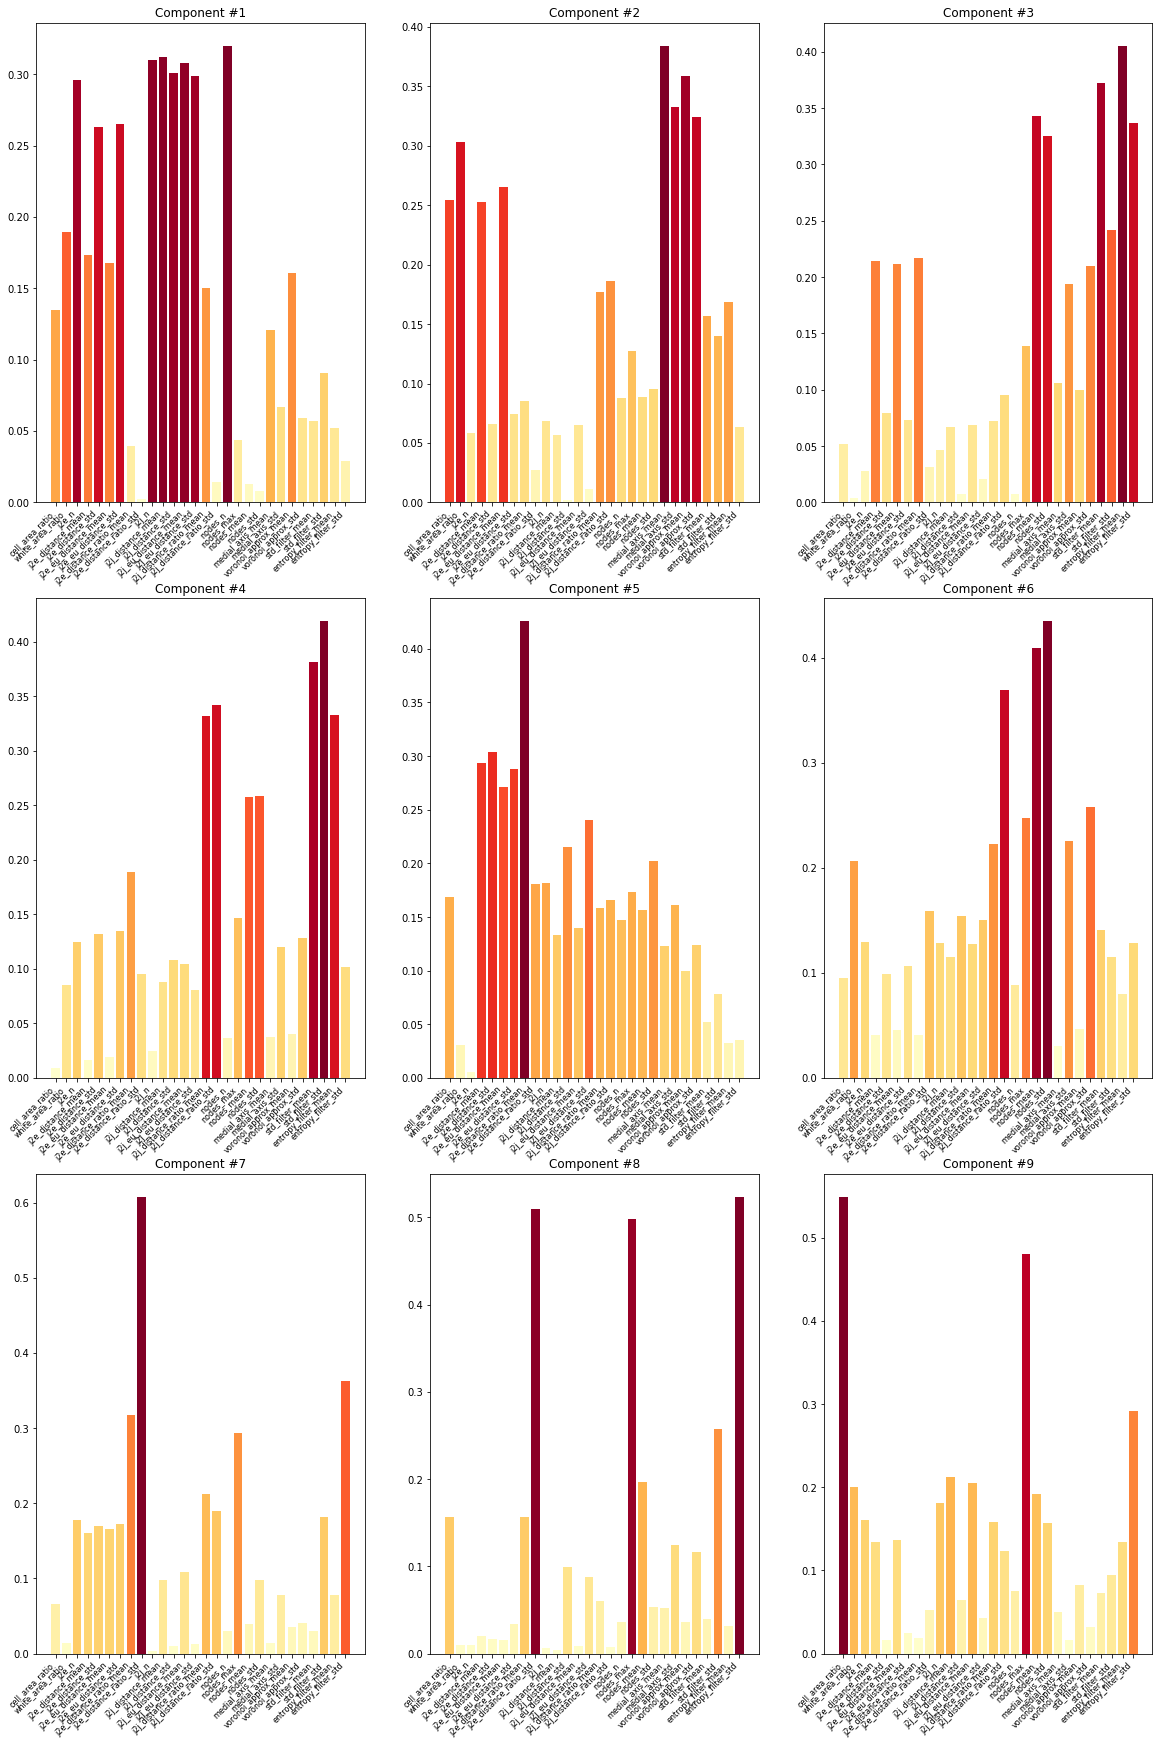

In [95]:
fig, axes = plt.subplots(3, 3, figsize=(20, 30))
x = np.arange(len(pca.components_[0]))
cmap = cm.YlOrRd

for index, comp in enumerate(pca.components_[:9]):
    iii, jjj = index // 3, index % 3
    abs_comp = np.abs(comp)
    norm = Normalize(vmin=abs_comp.min(), vmax=abs_comp.max())
    axes[iii, jjj].set_title(f'Component #{index + 1}')
    axes[iii, jjj].bar(x, abs_comp, color=cmap(norm(abs_comp)))
    axes[iii, jjj].set_xticks(x)
    axes[iii, jjj].set_xticklabels(features_names, rotation=45, ha='right', fontsize=8)
    axes[iii, jjj].set_aspect('auto', adjustable='box')

[Text(0, 0, &#39;j2e_distance_mean&#39;),
 Text(0, 0, &#39;j2e_eu_distance_mean&#39;),
 Text(0, 0, &#39;j2j_distance_ratio_mean&#39;),
 Text(0, 0, &#39;j2e_eu_distance_std&#39;),
 Text(0, 0, &#39;std_filter_std&#39;),
 Text(0, 0, &#39;j2j_eu_distance_mean&#39;),
 Text(0, 0, &#39;j2e_distance_std&#39;),
 Text(0, 0, &#39;medial_axis_std&#39;),
 Text(0, 0, &#39;j2j_distance_mean&#39;),
 Text(0, 0, &#39;voronoi_approx_mean&#39;),
 Text(0, 0, &#39;voronoi_approx_std&#39;),
 Text(0, 0, &#39;white_area_ratio&#39;),
 Text(0, 0, &#39;std_filter_mean&#39;),
 Text(0, 0, &#39;medial_axis_mean&#39;),
 Text(0, 0, &#39;j2j_n&#39;),
 Text(0, 0, &#39;entropy_filter_mean&#39;),
 Text(0, 0, &#39;nodes_n&#39;),
 Text(0, 0, &#39;nodes_max&#39;),
 Text(0, 0, &#39;cell_area_ratio&#39;),
 Text(0, 0, &#39;j2e_n&#39;),
 Text(0, 0, &#39;j2j_eu_distance_std&#39;),
 Text(0, 0, &#39;nodes_std&#39;),
 Text(0, 0, &#39;nodes_mean&#39;),
 Text(0, 0, &#39;j2j_distance_std&#39;),
 Text(0, 0, &#39;j2j_distance_ratio_std&#

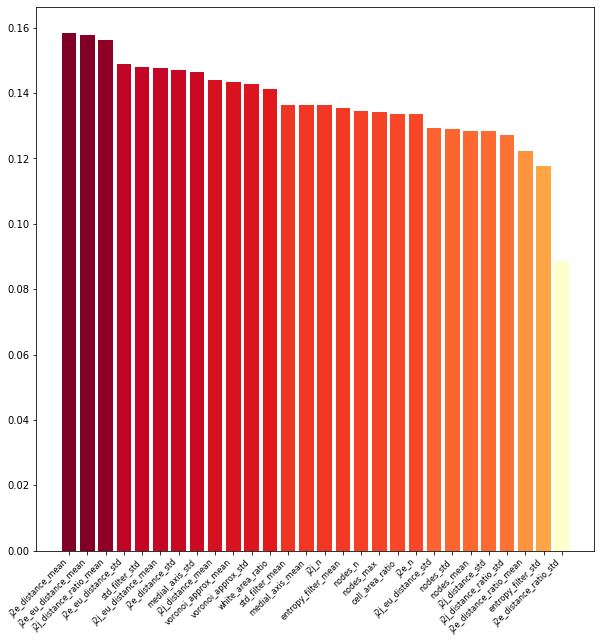

In [112]:
abs_comps = np.abs(pca.components_[:9])
exp_variance = pca.explained_variance_ratio_[:9]
contributions = abs_comps*exp_variance[:, np.newaxis]
cum_contributions = contributions.sum(axis=0)
norm = Normalize(vmin=cum_contributions.min(), vmax=cum_contributions.max())

sorted_index = cum_contributions.argsort()[::-1]
sorted_contribs = cum_contributions[sorted_index]
sorted_names = features_names[sorted_index]

fig, ax = plt.subplots(1, figsize=(10, 10))
ax.bar(x, sorted_contribs, color=cmap(norm(sorted_contribs)))
ax.set_xticks(x)
ax.set_xticklabels(sorted_names, rotation=45, ha='right', fontsize=8)

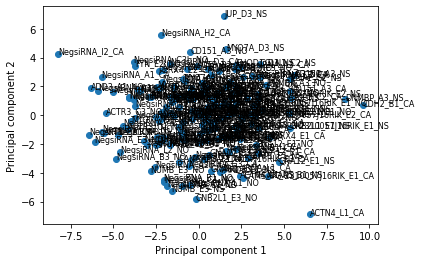

In [46]:
pca_array = pca_pipe.transform(df_norm)
fig, ax = plt.subplots(1)
ax.set_xlabel('Principal component 1')
ax.set_ylabel('Principal component 2')
plt.scatter(pca_array[:, 0], pca_array[:, 1])

labels = list(df_norm.index)

for index, label in enumerate(labels):
    ax.text(pca_array[index, 0], pca_array[index, 1], label, fontsize=8)

In [13]:
df_negsi_norm_ca = df_negsi_norm[df_negsi_norm.index.str[-2:] == 'CA']
df_negsi_norm_no = df_negsi_norm[df_negsi_norm.index.str[-2:] == 'NO']
df_test_norm_ca = df_test_norm[df_test_norm.index.str[-2:] == 'CA']
df_test_norm_no = df_test_norm[df_test_norm.index.str[-2:] == 'NO']
df_test_norm_ns = df_test_norm[df_test_norm.index.str[-2:] == 'NS']

&lt;matplotlib.legend.Legend at 0x7f4e7e0d7b20&gt;

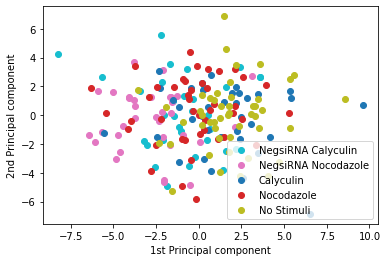

In [14]:
negsi_ca_transformed = pca_pipe.transform(df_negsi_norm_ca)
negsi_no_transformed = pca_pipe.transform(df_negsi_norm_no)
test_ca_transformed = pca_pipe.transform(df_test_norm_ca)
test_no_transformed = pca_pipe.transform(df_test_norm_no)
test_ns_transformed = pca_pipe.transform(df_test_norm_ns)

fig, ax = plt.subplots(1)
ax.set_xlabel('1st Principal component')
ax.set_ylabel('2nd Principal component')

arrays = [negsi_ca_transformed, negsi_no_transformed, test_ca_transformed, test_no_transformed, test_ns_transformed]
labels = ['NegsiRNA Calyculin', 'NegsiRNA Nocodazole', 'Calyculin', 'Nocodazole', 'No Stimuli']
colors = ['tab:cyan', 'tab:pink', 'tab:blue', 'tab:red', 'tab:olive']

for array, label, color in zip(arrays, labels, colors):
    ax.scatter(array[:, 0], array[:, 1], color=color, label=label)

#for index, label in enumerate(df_ca.index):
#    ax.text(ca_transformed[index, 0], ca_transformed[index, 1], label, fontsize=8)
#for index, label in enumerate(df_ns.index):
#    ax.text(ns_transformed[index, 0], ns_transformed[index, 1], label, fontsize=8)
#for index, label in enumerate(df_no.index):
#    ax.text(no_transformed[index, 0], no_transformed[index, 1], label, fontsize=8)
#ax.scatter(ns_transformed[:, 0], ns_transformed[:, 1], label='No stimuli')
ax.legend()

In [15]:
pca_pipe

Pipeline(steps=[(&#39;standardscaler&#39;, StandardScaler()),
                (&#39;pca&#39;, PCA(n_components=10))])

&lt;matplotlib.legend.Legend at 0x7f4e7e0a59a0&gt;

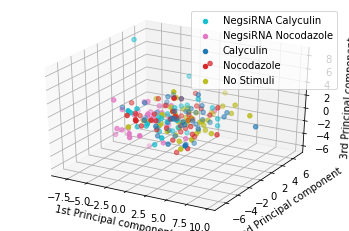

In [16]:
from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.set_xlabel('1st Principal component')
ax.set_ylabel('2nd Principal component')
ax.set_zlabel('3rd Principal component')

for array, label, color in zip(arrays, labels, colors):
    ax.scatter(array[:, 0], array[:, 1], array[:, 2], color=color, label=label)


#for index, label in enumerate(df_ca.index):
#    ax.text(ca_transformed[index, 0], ca_transformed[index, 1], label, fontsize=8)
#for index, label in enumerate(df_ns.index):
#    ax.text(ns_transformed[index, 0], ns_transformed[index, 1], label, fontsize=8)
#for index, label in enumerate(df_no.index):
#    ax.text(no_transformed[index, 0], no_transformed[index, 1], label, fontsize=8)
#ax.scatter(ns_transformed[:, 0], ns_transformed[:, 1], label='No stimulo')
ax.legend()


In [17]:
def get_row_data(name, df, array):
    if name in df.index:
        pos = df.index.get_loc(name)
        return array[pos]
    return None

def my_scatter(ax, array, color, label):
    if array is None:
        return
    else:
        ax.scatter(array[0], array[1], color=color, label=label)

&lt;matplotlib.legend.Legend at 0x7f4e7d65e9a0&gt;

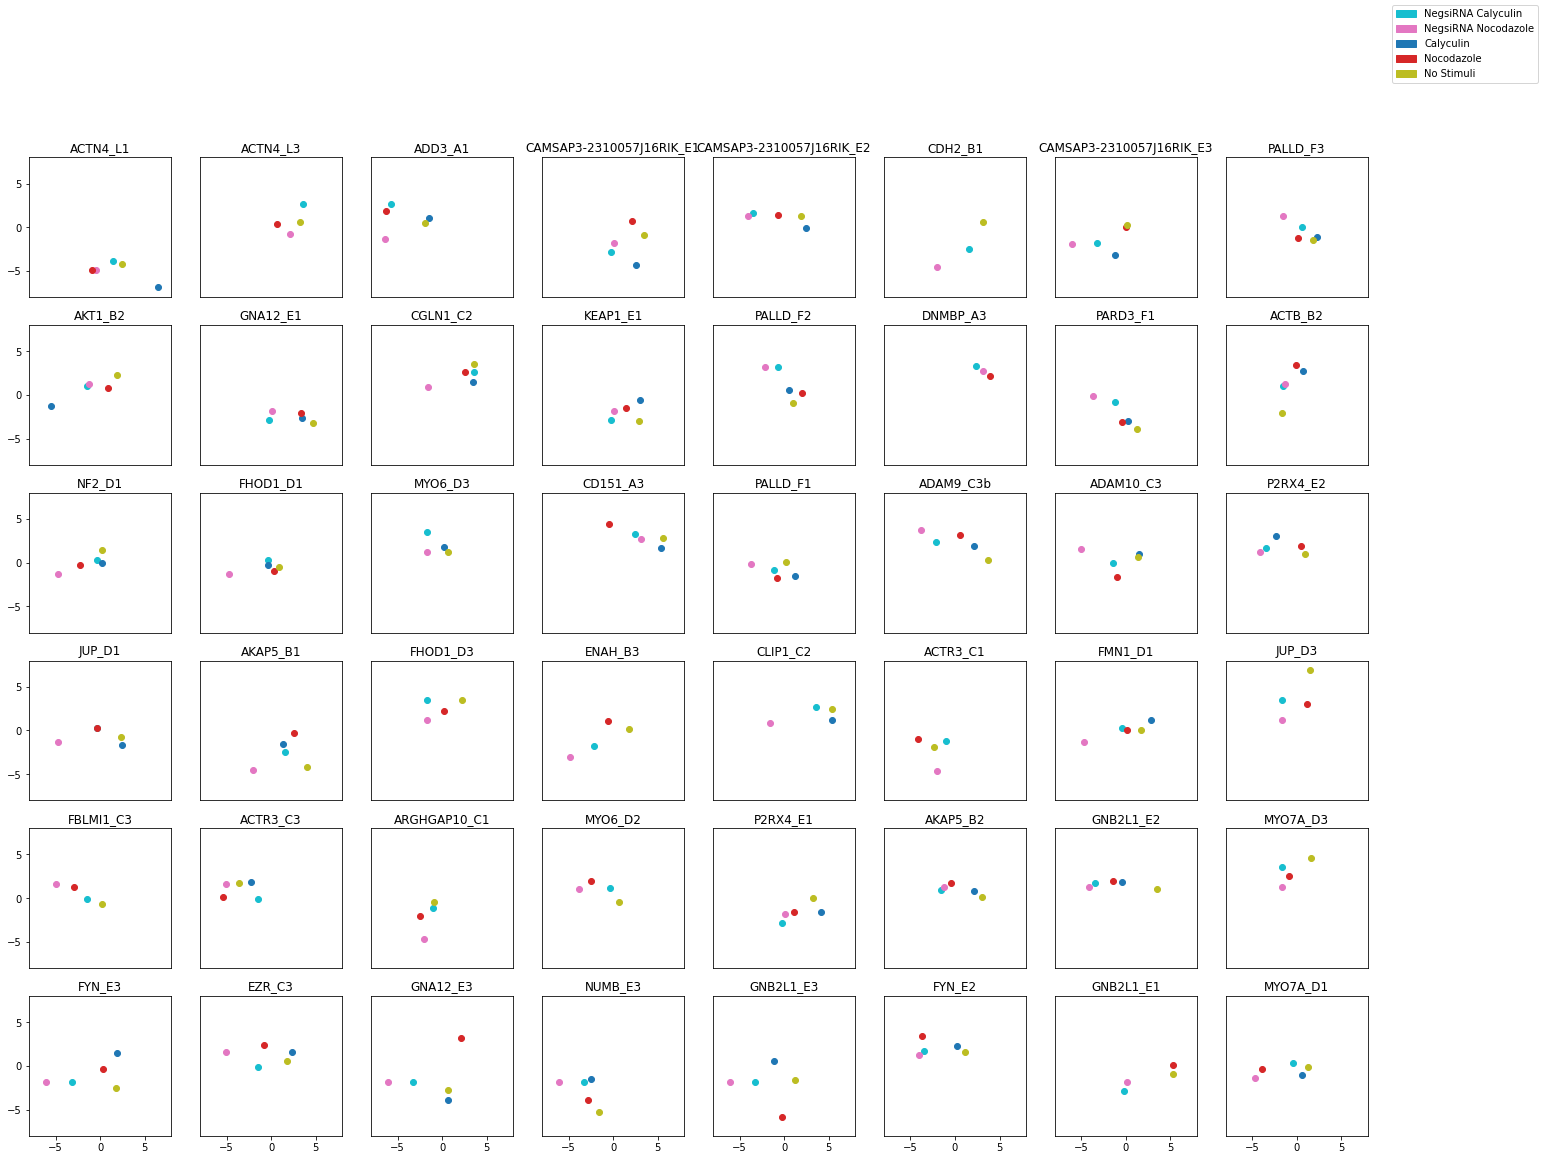

In [18]:
names = set(df_test_norm.index.str[:-3])
fig, axes = plt.subplots(6, 8, figsize=(24,18))
for i, name in enumerate(names):
    current_ax = axes[int(i/8), i%8]
    plate_id = name.split("_")[1]
    ca_row = get_row_data("{}_CA".format(name), df_test_norm_ca, test_ca_transformed)
    no_row = get_row_data("{}_NO".format(name), df_test_norm_no, test_no_transformed)
    ns_row = get_row_data("{}_NS".format(name), df_test_norm_ns, test_ns_transformed)
    negsi_ca_row = get_row_data("NegsiRNA_{}_CA".format(plate_id), df_negsi_norm_ca, negsi_ca_transformed)
    negsi_no_row = get_row_data("NegsiRNA_{}_NO".format(plate_id), df_negsi_norm_no, negsi_no_transformed)
    
    points = [negsi_ca_row, negsi_no_row, ca_row, no_row, ns_row]
    for point, color, label in zip(points, colors, labels):
        my_scatter(current_ax, point, color, label)
    
    current_ax.set_title(name)
    if (i % 8) != 0:
        current_ax.set_yticks([])
    if (int(i / 8)) != 5:
        current_ax.set_xticks([])
    current_ax.set_xlim(-8, 8)
    current_ax.set_ylim(-8, 8)
    
patches = [mpatches.Patch(color=colors[j], label=labels[j]) for j in range(len(colors))]
fig.legend(handles=patches)